<a href="https://colab.research.google.com/github/BrianKipngeno/Iris-flower-classification-with-Pytorch/blob/main/Iris_flower_classification_with_PyTorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our goal is to classify each observation into one of three different species (setosa, versicolor, or virginica) based on the measurements of the sepal length, sepal width, petal length, and petal width.

To solve this classification problem, we will follow all the steps from our slide below:

- Step 1: Dataset preparation

- Step 2: Building the model

- Step 3: Forward propagation

- Step 4: Loss computation

- Step 5: Backpropagation

- Step 6: Make predictions


### Step 1: Data preparation

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# We’re going to use popular Iris dataset to build, train and test the neural network.
# Dataset link = http://bit.ly/IrisDataset

In [3]:
# Lets load our dataset
df1 = pd.read_csv("http://bit.ly/IrisDataset")

df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Lets check the unique classes in the species. We will use these classes for our model.
print(df1.species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
# The species which we are going to predict is not in numbers.
# Therefore, we convert categorical column species to a numerical column.
# This is vital because neural networks cannot process complex data types but numbers.
# Let's assign specific numbers to the species
df1['species'] = df1['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [6]:
# Let's display the first few columns to check our changes
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step 2: Building the model

We’re going to predict the species after looking at the sepal and petal lengths. The input data will be sepal_length, sepal_width, petal_length and petal_width. Output would be just the species.

In [7]:
# Let's specify our input and output features.
X = df1.drop(["species"],axis=1).values

y = df1["species"].values

**Doing the Train Test split**

We build a machine learning models to prepare for the data you will encounter in the future. For this, we need a test set which is the same structure as the one used in training but is separate. We split the dataset into (X and y), training and testing sets respectively. The training sets (X_train and y_train) will be used to train a machine learning model. The testing sets (X_test and y_test) will be used to evaluate the model's performance on the unseen data. The split is done in a randomized manner(random_state) for reproducibility.

In [8]:
# Let's import train_test_split and proceed to split our dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Scaling the data**

Scaling is crucial in machine learning to prevent dominant fearures from overshadowing others and boosting model performance. We use standardScaler from scikit-learn to standardize the features in both the training (X_train) and testing (X_test) datasets. The fit_transform method is used on the training set to compute the mean and standard deviation of the features and then standardize the data. The transform method is applied to the testing set using the same mean and standard deviation calculated from the training set to ensure consistency in scaling between the two datasets.

In [9]:
# Let's scale our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

**Converting numpy arrays to tensors**


Tensors are at the core of PyTorch providing a versatile data structure for numerical computations and serving as the foundation for building and training neural networks. While working with PyTorch we must always convert our data to tensors.

In [10]:
# Converting from numpy arrays to torch tensor
X_train = torch.FloatTensor(X_train)

X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)

y_test = torch.LongTensor(y_test)


Next, we create our model.

The Net class defined here is a simple neural network with one hidden layer, used for classification tasks.

- The init() method initializes the layers of the network.

- The fc1 layer performs a linear transformation on the input, relu applies the rectified linear activation function, and fc2 performs another linear transformation to produce the final output.

- The forward method defines the computation that happens in the neural network.

- An instance of the Net class is created with the input size, hidden size, and number of classes set to 4, 8, and 3, respectively.

- This instance of the Net class represents our neural network model that we train and use to make predictions.

We have three layers: an input layer, a hidden layer, and an output layer.

- We set the input layer size to 4 since the iris dataset has four features.

- We set the hidden layer size to 8 in this case. You can play around with the hidden layer size.

- Finally, we set the output layer size to 3 to represent the three different iris plant categories.

In [11]:
# Let's now create our model
from torch import nn, optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = Net(input_size=4, hidden_size=8, num_classes=3)

### Steps 3 to 5

Training involves iterating the steps below over the dataset. We notice that steps 3,4,& 5 of our model occur while training our model. Here are the steps for training:

- **Step 3: Forward propagation**

Pass the input data through the model to obtain predictions.

- **Step 4: Loss computation**

Calculate the loss using the predictions and actual labels.

- Step 5: Backpropagation

Perform backpropagation to compute gradients of the loss with respect to the model parameters.

- **Update Parameters**

Use the optimizer to update the model parameters based on the computed gradients.


These steps make up an epoch and in each, we print the current epoch number and the loss value. The .item() function is used to extract the loss value from the PyTorch tensor. and detach().numpy() is used to convert it to a NumPy array. By the end of this loop, our model will be trained and ready to make predictions on new data.


[ ]


In [12]:
# Let's train our model
# We use the nn.CrossEntropyLoss() function as the loss function.
# We also use the SGD optimizer with a learning rate of 0.001 and a momentum of 0.9.
# Let's define the loss using criterionn and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
num_epochs = 100

loss_vals = []

for epoch in range(num_epochs):
    outputs = model(X_train)

    # Let's clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()

    # Step 3: Forward propagation
    outputs = model(X_train)

    # Step 4: Loss computation
    loss = criterion(outputs, y_train)

    # Step 5: Backward propagation to calculate gradients and optimization
    loss.backward()

    loss_vals.append(loss.detach().numpy().item())

    # Updating the weights
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.9224
Epoch [20/100], Loss: 0.7923
Epoch [30/100], Loss: 0.6499
Epoch [40/100], Loss: 0.5236
Epoch [50/100], Loss: 0.4375
Epoch [60/100], Loss: 0.3847
Epoch [70/100], Loss: 0.3499
Epoch [80/100], Loss: 0.3248
Epoch [90/100], Loss: 0.3055
Epoch [100/100], Loss: 0.2894


Next, we plot the loss to see how it decreases with each epoch. We would want to see a decreasing trend in the loss indicating that the model is learning and improving over time. This is a good practice to help you identify any model performance anomalie

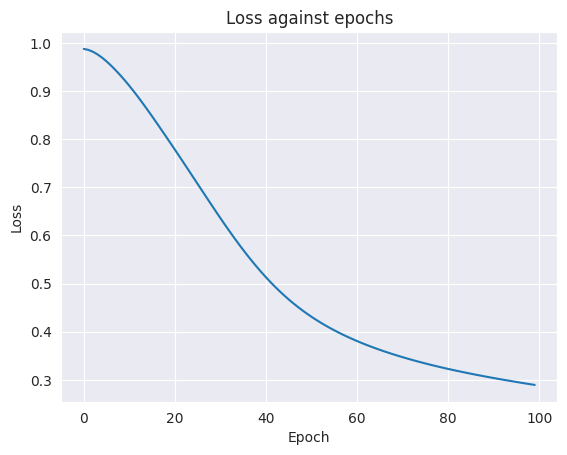

In [13]:
# Let's plot our loss with seaborn
import seaborn as sns

sns.set_style('darkgrid')

indexes = list(range(len(loss_vals)))

sns.lineplot(x = indexes, y = loss_vals)

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('Loss against epochs')

plt.show()

### Step 6: Making predictions

Finally we compute the accuracy.

- The torch.no_grad() is used to disable gradient computation during this evaluation phase.
- The model is applied to the test data (X_test) to generate predictions (outputs).
- The torch.max function is then used to obtain the predicted class indices along the specified dimension (1, representing the class dimension).
- The accuracy of the model is computed by comparing the predicted class indices with the true labels (y_test) using the accuracy_score function from scikit-learn.

Finally, the accuracy is printed as a percentage.

In [14]:
# Finally, we'll calculate the accuracy of our model.
# Let's import the necessary libraries for this task.
from sklearn.metrics import accuracy_score

with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)

    accuracy = accuracy_score(y_test, predicted)

    print(f'Accuracy: {100 * accuracy:.2f}%')

Accuracy: 86.67%


### Making inference on new data

We can use our trained model to make a prediction on a new observaton (4.6, 3.4, 1.2, 0.1)

In [15]:
# Convert the input to a torch tensor
new_data = torch.FloatTensor([[4.6, 3.4, 1.2, 0.1]])

In [16]:
# Standardize the new data using the same scaler used for training
new_data_standardized = torch.FloatTensor(scaler.transform(new_data.numpy()))

In [17]:
# Let's make an inference with the trained model
with torch.no_grad():

    model.eval()
    predicted_output = model(new_data_standardized)
    _, predicted_class = torch.max(predicted_output, 1)

    class_index_to_species = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

    predicted_species = class_index_to_species[predicted_class.item()]

print(f'Predicted class: {predicted_class.item()}')

print(f'Predicted species: {predicted_species}')


Predicted class: 0
Predicted species: Setosa
